# Overskrift

<ul>
<li>Rense data
<li>Display data
<li>Kanskje finne noen pakker som støtter adx og de der?
<li>Sette indikatorverktøy i egne py filer


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import stockstats

from lib.rens import rens
from lib.god_runde import positiv_utvikling

In [105]:
def hent_indikatortall(data, gode):
    stock = stockstats.StockDataFrame.retype(data)
    stock['rsi_12']
    stock['trix']
    stock['adx']
    stock['kdjk']
    
    rsi = []
    trix = []
    adxr = []
    kdjk = []
    for ix, fin in gode.iterrows():
        oppgang = stock[int(fin.start):int(fin.endex)]
        rsi.append(oppgang.rsi_12.values)
        trix.append(oppgang.trix.values)
        adxr.append(oppgang.adxr.values)
        kdjk.append(oppgang.kdjk.values)
        
    
    return rsi, trix, adxr, kdjk      

In [69]:
cleanup = rens()
pos_ut = positiv_utvikling()

In [106]:
fil = pd.read_excel('data/Aker 02.04.2020.xlsx')
data = cleanup.clean_data(fil)
gode = pos_ut.calculate(data)
rsi, trix, adxr, kdjk = hent_indikatortall(data, gode)
gode['rsi'] = rsi
gode['trix'] = trix
gode['adxr'] = adxr
gode['kdjk'] = kdjk

C:\Users\Stian\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
gode

,start,endex,start_pris,slutt_pris,oppgang,score,rsi,trix,adxr,kdjk
0,128,186,240.2,247.8,3.164030,50.703007,"[29.08667618110441, 29.086676181104394, 38.508...","[-0.04397465516493707, -0.045443866319610726, ...","[30.19964066608519, 33.407059607068106, 33.916...","[10.330356638278655, 6.886904425519103, 21.257..."
1,229,267,245.8,249.6,1.545972,31.951273,"[53.226517486104214, 48.34750785504549, 48.347...","[-0.010354636272359287, -0.009138505674278392,...","[15.09565910714205, 13.631975273648532, 11.912...","[56.62048569675035, 57.74699046450004, 58.4979..."


In [87]:
linjer = [dict(type='line', yref='paper', y0=0,y1=1, xref='x',x0=info.start, x1=info.start,
                    line=dict(color="Green"))
                for j,info in gode.iterrows()]
linjer_slutt =  [dict(type='line', yref='paper', y0=0,y1=1, xref='x',x0=info.endex, x1=info.endex,
                      line=dict(color="Red"))
                 for j,info in gode.iterrows()]
linjer.extend(linjer_slutt)

In [88]:
fig = px.line(data, x='tid', y='open')
fig.update_layout(shapes=linjer)

In [7]:
#fig.write_image("images/eksempel.png")

In [89]:
data

,tid,open,close,high,low,volume,amount,close_-1_s,close_-1_d,closepm,closenm,closepm_12_smma,closenm_12_smma,rs_12,rsi_12
0,9:0,239.0,239.0,239.0,239.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9:1,239.2,239.2,239.2,239.2,180,180,239.0,0.2,0.2,0.0,0.200000,0.000000,inf,100.000000
2,9:2,241.0,241.0,241.0,241.0,66,66,239.2,1.8,1.8,0.0,1.034783,0.000000,inf,100.000000
3,9:3,242.2,242.2,242.2,242.2,22,22,241.0,1.2,1.2,0.0,1.094710,0.000000,inf,100.000000
4,9:4,245.2,245.2,245.2,245.2,100,100,242.2,3.0,3.0,0.0,1.634881,0.000000,inf,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,16:16,240.4,240.4,240.4,240.4,14,14,240.2,0.2,0.2,0.0,0.165078,0.126934,1.300506,56.531300
373,16:17,240.4,240.4,240.4,240.4,18,18,240.4,0.0,0.0,0.0,0.151321,0.116356,1.300506,56.531300
374,16:18,240.4,240.4,240.4,240.4,83,83,240.4,0.0,0.0,0.0,0.138711,0.106659,1.300506,56.531300
375,16:19,239.6,239.6,239.6,239.6,14,14,240.4,-0.8,0.0,0.8,0.127152,0.164438,0.773253,43.606453


In [9]:
# må ha: open, close, high, low, volume, amount
stock = stockstats.StockDataFrame.retype(data)

In [10]:
stock

,tid,open,close,high,low,volume,amount
0,9:0,53.00,53.00,53.00,53.00,11,11
1,9:1,55.00,55.00,55.00,55.00,950,950
2,9:2,55.00,55.00,55.00,55.00,500,500
3,9:3,54.95,54.95,54.95,54.95,50,50
4,9:4,55.20,55.20,55.20,55.20,34,34
...,...,...,...,...,...,...,...
251,13:44,56.60,56.60,56.60,56.60,100,100
252,13:45,56.80,56.80,56.80,56.80,400,400
253,13:46,56.70,56.70,56.70,56.70,270,270
254,13:47,56.45,56.45,56.45,56.45,400,400


In [11]:
stock['boll_lb']
stock['trix']

C:\Users\Stian\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0           NaN
1      0.599723
2      0.440963
3      0.343288
4      0.287910
         ...   
251    0.028979
252    0.029936
253    0.031827
254    0.032428
255    0.031120
Name: trix, Length: 256, dtype: float64

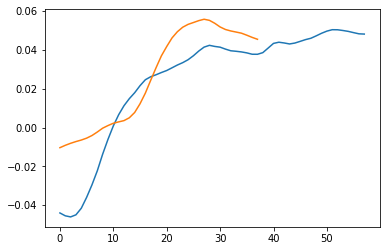

In [108]:
for i in gode.trix:
    plt.plot(i)
#px.line(gode, y='rsi')
#px.line(stock, x='tid', y='adx')

In [ ]:
px.line(stock, x='tid', y=['adxr', 'kdjk'])

In [ ]:
px.bar(stock, x='tid', y=['trix'])